#TMRE MitoTracker green analysis


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
from PIL import Image, ImageOps, ImageEnhance, ImageFilter
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import seaborn as sns

In [7]:
#Chose colour map in https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

#Functions
def SignalModeling(image):
    kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1,1))
    image1 = cv2.erode(image, kernel1)
    kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1,1))
    image2 = cv2.dilate(image1, kernel2)

    return image2

def TMREanalysis(image1, image2, thresmin, thresmax):
    #Use mask for green and red channels
    plt.figure(figsize = (8,8))
    plt.imshow(image1)
    imagegray1 = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)
    plt.show()

    fig = plt.figure(figsize = (8,8))
    plot = plt.imshow(imagegray1, cmap = 'inferno', vmin = thresmin, vmax = thresmax)
    fig.colorbar(plot)

    TMREsignal = 0
    for row in range(image2.shape[0]):
      for col in range(image2.shape[1]):
        if image2[row,col][1] != 0:
          TMREsignal = TMREsignal + imagegray1[row,col]

    imagegray2 = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)

    Mitosignal = 0
    for row in range(imagegray2.shape[0]):
      for col in range(imagegray2.shape[1]):
          Mitosignal = Mitosignal + imagegray2[row,col]

    da = {'TMRE' : [round(TMREsignal/(imagegray1.shape[0]*imagegray1.shape[0]),2)], 'MitoTracker' : [round(Mitosignal/(imagegray2.shape[0]*imagegray2.shape[0]),2)]}
    dataframe = pd.DataFrame(data = da)

    return dataframe


# Working section

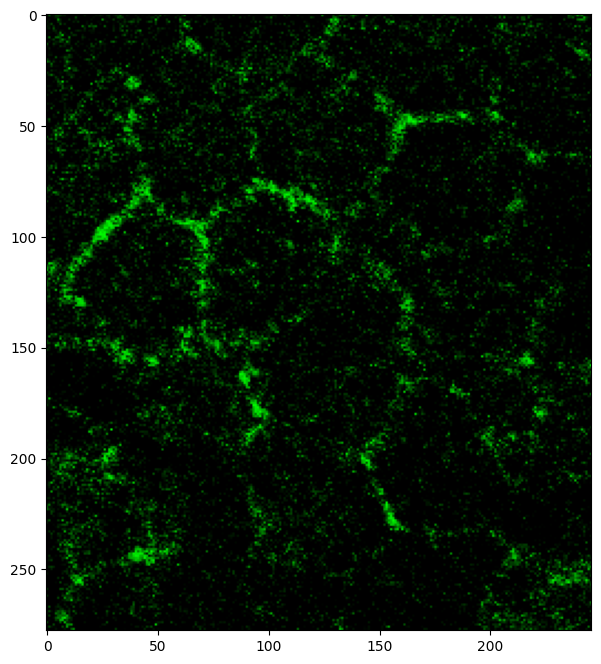

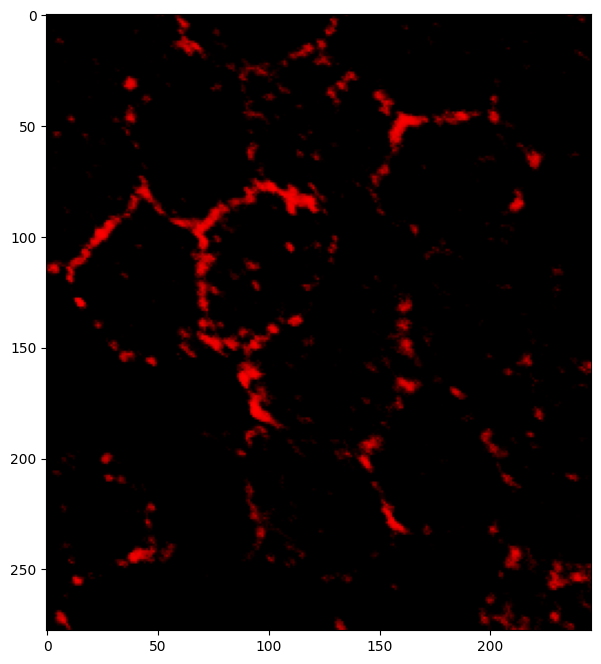

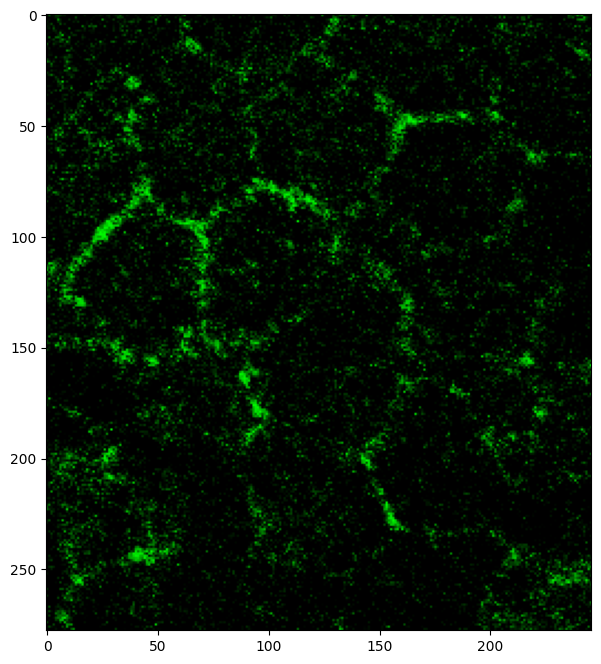

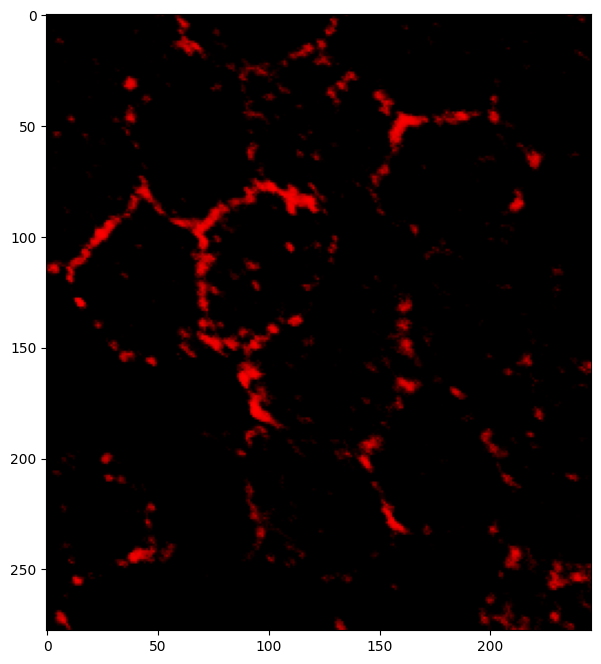

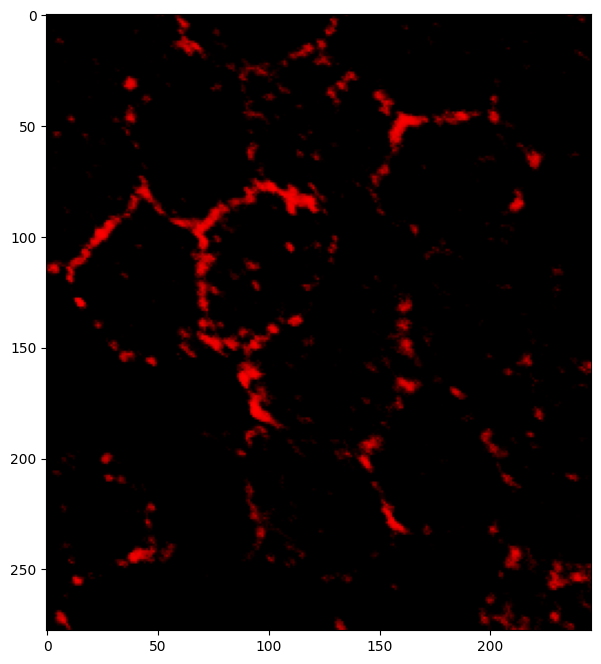

,TMRE,MitoTracker
0,2.17,8.8


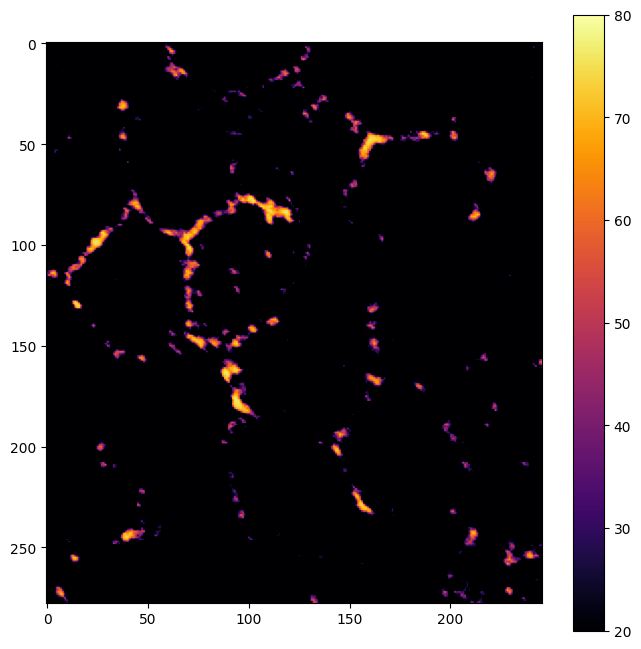

In [8]:
# OD 3 TEMPORAL #

#Open and read image (MitoTracker)
path = r"/content/drive/MyDrive/Python protocols/Imagenes/TMRE MT green analysis SCGx 4w/MitoTracker/R3 OD T.tif"
image1 = cv2.imread(path)

#Open and read image (TMRE)
path = r"/content/drive/MyDrive/Python protocols/Imagenes/TMRE MT green analysis SCGx 4w/TMRE/R3 OD T.tif"
image2 = cv2.imread(path)

#Show image in RGB
imageRGB1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
imageRGB2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (8,8))
plt.imshow(imageRGB1)
plt.show()

plt.figure(figsize = (8,8))
plt.imshow(imageRGB2)
plt.show()

#'SIGNALMODELING'
imageRGB1fil = SignalModeling(imageRGB1)
imageRGB2fil = SignalModeling(imageRGB2)

plt.figure(figsize = (8,8))
plt.imshow(imageRGB1fil)
plt.show()


plt.figure(figsize = (8,8))
plt.imshow(imageRGB2fil)
plt.show()


#TMRE ANALYSIS
minlvl = 20
maxlvl = 80

TMREdata = TMREanalysis(imageRGB2fil, imageRGB1fil, minlvl, maxlvl)
TMREdata